<a href="https://colab.research.google.com/github/asve06/act1_2p_si_eda_2_25_vega/blob/main/code/act1_2p_si_eda_2_25_vega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Women Perfume Recommendation Based on Note Similarities Project**
Ashley Vega   
*Task:* Recommend similar perfumes based on their descriptions.   
*Description:*  The goal of this project is to build a recommendation system that suggests perfumes with similar characteristics or notes by analyzing text data, focusing only on women’s fragrances. This idea explores how machine learning can be used to understand preferences and find connections between products.  
*Task Type:* Classification.  
*Algorithm:* K-Nearest Neighbors (K-NN).

## **EDA Analysis**

**Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Load csv file**

In [ ]:
df = pd.read_csv("/content/fraganciasdt.csv")

In [ ]:
df.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,1.42,201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,1.86,70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,1.91,285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride-edition-man,bruno-banani,Germany,men,1.92,59,2019.0,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",unknown,NaN,fruity,nutty,woody,tropical,NaN
4,https://www.fragrantica.com/perfume/jean-paul-...,le-male-pride-collector,jean-paul-gaultier,France,men,1.93,632,2020.0,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",francis kurkdjian,NaN,aromatic,warm spicy,fresh spicy,cinnamon,vanilla


In [ ]:
# General info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24063 entries, 0 to 24062
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           24063 non-null  object 
 1   Perfume       24063 non-null  object 
 2   Brand         24063 non-null  object 
 3   Country       24063 non-null  object 
 4   Gender        24063 non-null  object 
 5   Rating Value  24063 non-null  float64
 6   Rating Count  24063 non-null  int64  
 7   Year          22026 non-null  float64
 8   Top           24063 non-null  object 
 9   Middle        24063 non-null  object 
 10  Base          24063 non-null  object 
 11  Perfumer1     24063 non-null  object 
 12  Perfumer2     1336 non-null   object 
 13  mainaccord1   24063 non-null  object 
 14  mainaccord2   24050 non-null  object 
 15  mainaccord3   23949 non-null  object 
 16  mainaccord4   23675 non-null  object 
 17  mainaccord5   23082 non-null  object 
dtypes: float64(2), int64(1), o

In [ ]:
# General statistical info summary
df.describe()

,Rating Value,Rating Count,Year
count,24063.000000,24063.000000,22026.000000
mean,3.960379,501.396542,2012.455961
std,0.277429,1429.484690,13.526737
min,1.420000,26.000000,1781.000000
25%,3.790000,56.000000,2010.000000
50%,3.970000,127.000000,2015.000000
75%,4.150000,360.000000,2019.000000
max,4.930000,29858.000000,2024.000000


In [ ]:
# Checking the unique categories in the "Gender" column to look for the perfume audience in this case women for my project
df["Gender"].unique()

array(['unisex', 'women', 'men'], dtype=object)

In [ ]:
# Filter only the perfumes designed for women
df_clean = df[df["Gender"] == "women"]

In [ ]:
# Data cleaning normalization - all text data converted to lowercase and removed extra spaces in perfume and brand names
df_clean["Perfume"] = df_clean["Perfume"].str.lower().str.strip()
df_clean["Brand"] = df_clean["Brand"].str.lower().str.strip()

/tmp/ipython-input-3454709912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Perfume"] = df_clean["Perfume"].str.lower().str.strip()
/tmp/ipython-input-3454709912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Brand"] = df_clean["Brand"].str.lower().str.strip()


In [ ]:
# Check missing values to detect incomplete or empty fields
print(df_clean.isnull().sum())

url                 0
Perfume             0
Brand               0
Country             0
Gender              0
Rating Value        0
Rating Count        0
Year             1052
Top                 0
Middle              0
Base                0
Perfumer1           0
Perfumer2       10621
mainaccord1         0
mainaccord2         4
mainaccord3        53
mainaccord4       207
mainaccord5       501
dtype: int64


In [ ]:
# Filled empty fields in `Perfumer2` and `mainaccord2–5` with `"unknown"
df_clean.fillna({'Perfumer2': 'unknown',
                 'mainaccord2': 'unknown',
                 'mainaccord3': 'unknown',
                 'mainaccord4': 'unknown',
                 'mainaccord5': 'unknown'}, inplace=True)

/tmp/ipython-input-1122484068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.fillna({'Perfumer2': 'unknown',


In [ ]:
print(df_clean.isnull().sum())

url                0
Perfume            0
Brand              0
Country            0
Gender             0
Rating Value       0
Rating Count       0
Year            1052
Top                0
Middle             0
Base               0
Perfumer1          0
Perfumer2          0
mainaccord1        0
mainaccord2        0
mainaccord3        0
mainaccord4        0
mainaccord5        0
dtype: int64


In [ ]:
# Removed repeated records based on a combination of `Perfume`, `Brand`, and `Year`.
df_clean.drop_duplicates(subset=["Perfume", "Brand", "Year"], inplace=True)

/tmp/ipython-input-2508853140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(subset=["Perfume", "Brand", "Year"], inplace=True)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11371 entries, 1 to 24058
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           11371 non-null  object 
 1   Perfume       11371 non-null  object 
 2   Brand         11371 non-null  object 
 3   Country       11371 non-null  object 
 4   Gender        11371 non-null  object 
 5   Rating Value  11371 non-null  float64
 6   Rating Count  11371 non-null  int64  
 7   Year          10319 non-null  float64
 8   Top           11371 non-null  object 
 9   Middle        11371 non-null  object 
 10  Base          11371 non-null  object 
 11  Perfumer1     11371 non-null  object 
 12  Perfumer2     11371 non-null  object 
 13  mainaccord1   11371 non-null  object 
 14  mainaccord2   11371 non-null  object 
 15  mainaccord3   11371 non-null  object 
 16  mainaccord4   11371 non-null  object 
 17  mainaccord5   11371 non-null  object 
dtypes: float64(2), int64(1), object

## **Graphs**

In [ ]:
top_accords = df_clean['mainaccord1'].value_counts().head(10)

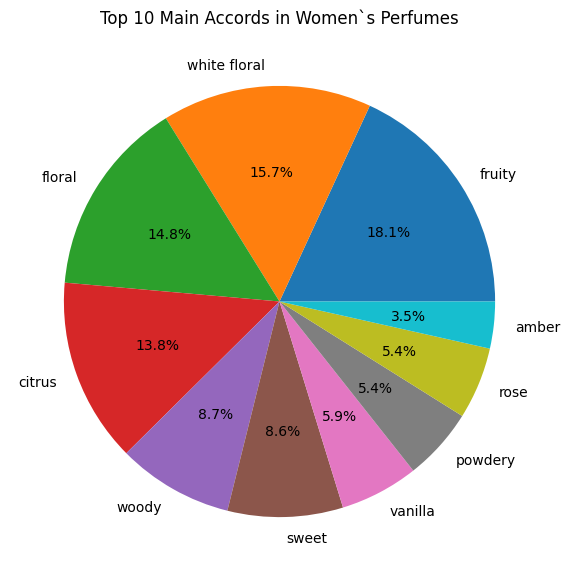

In [ ]:
# Univariate Analysis: Main Accords Distribution

plt.figure(figsize=(7, 7))
plt.pie(top_accords.values, labels=top_accords.index, autopct='%1.1f%%')
plt.title('Top 10 Main Accords in Women`s Perfumes')
plt.show()

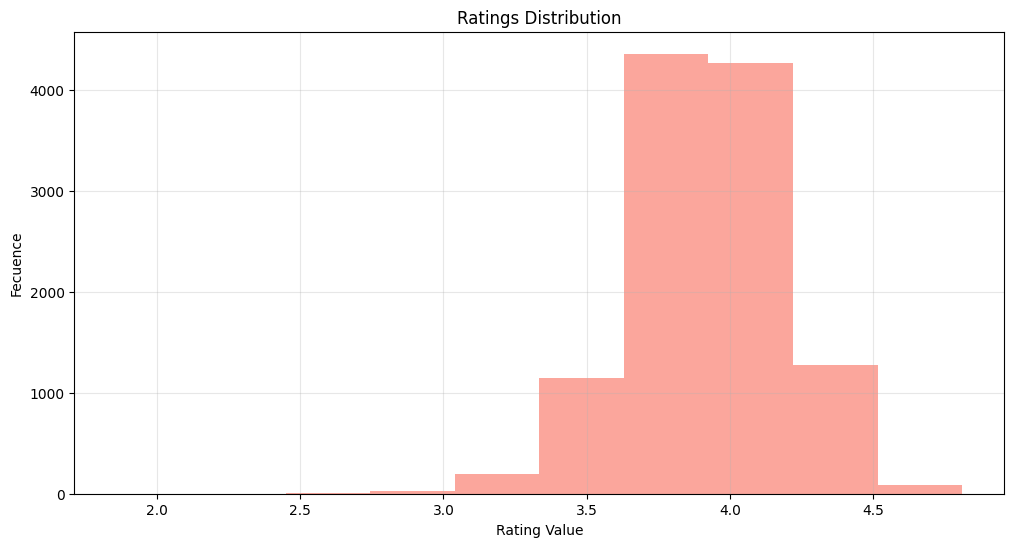

In [ ]:
# Univariate Analysis: Distribution of Rating Values
plt.figure(figsize=(12, 6))
plt.hist(df_clean['Rating Value'], color='salmon', alpha=0.7)
plt.xlabel('Rating Value')
plt.ylabel('Fecuence')
plt.title('Ratings Distribution')
plt.grid(True, alpha=0.3)
plt.show()

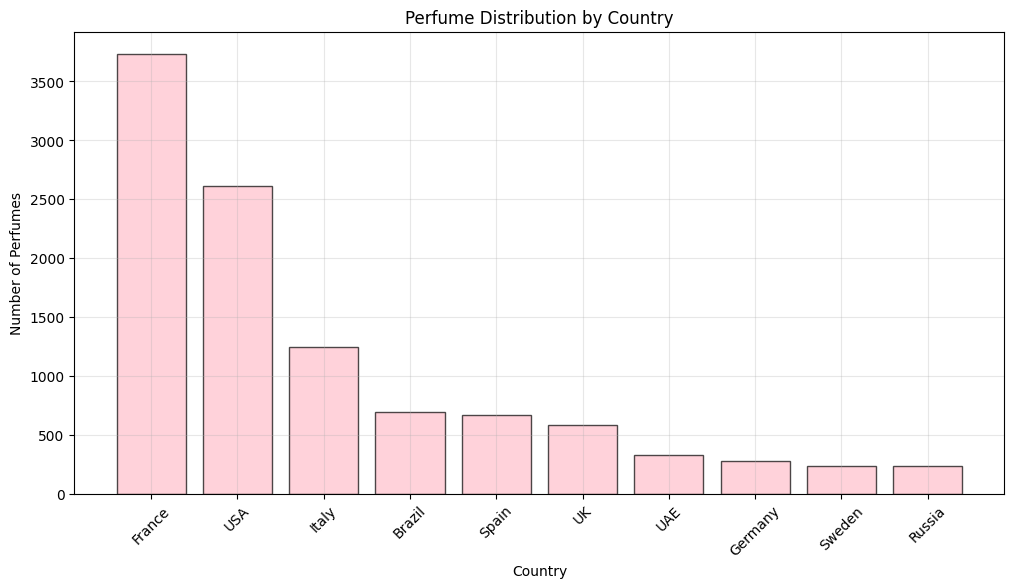

In [ ]:
# Univariate Analysis: Distribution of Perfumes by Country
plt.figure(figsize=(12, 6))
country_counts = df_clean['Country'].value_counts().head(10)
plt.bar(country_counts.index, country_counts.values, color='pink', alpha=0.7, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Number of Perfumes')
plt.title('Perfume Distribution by Country')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

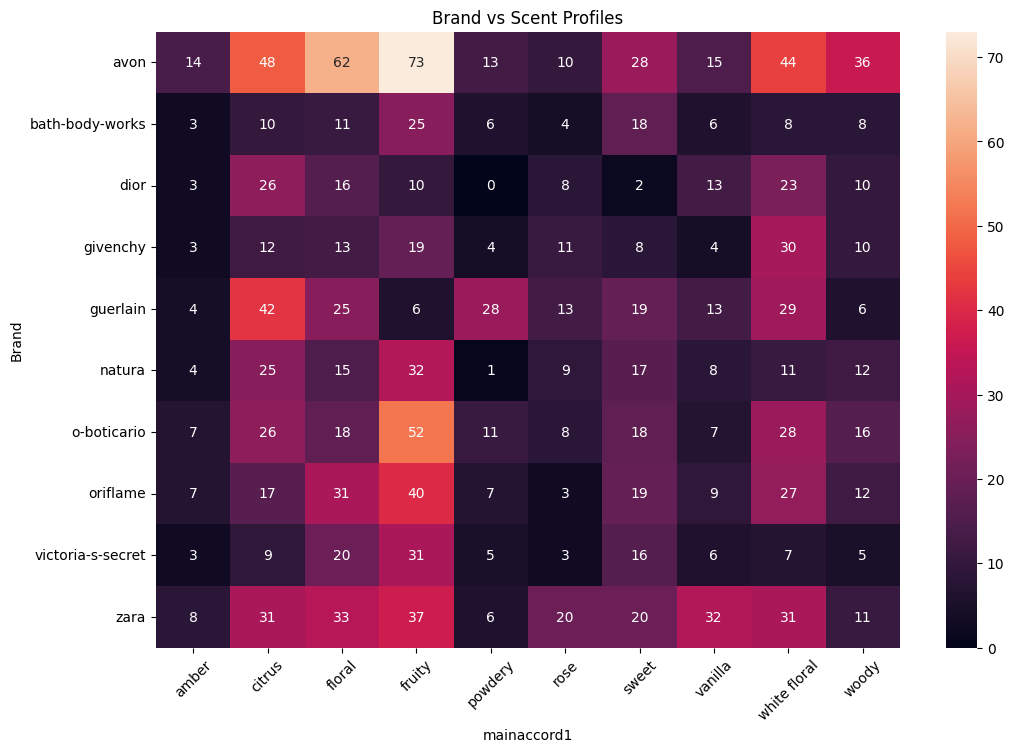

In [ ]:
# Bivariate Analysis: Brand vs Scent Profiles
plt.figure(figsize=(12, 8))
# filter top 10 brands and accords1
filtered = df_clean[df_clean['Brand'].isin(df_clean['Brand'].value_counts().head(10).index) &
                    df_clean['mainaccord1'].isin(top_accords.index)]
# create the heatmap showing counts of perfumes for each brand with accord combination
sns.heatmap(pd.crosstab(filtered['Brand'], filtered['mainaccord1']), annot=True)
plt.title('Brand vs Scent Profiles')
plt.xticks(rotation=45)
plt.show()

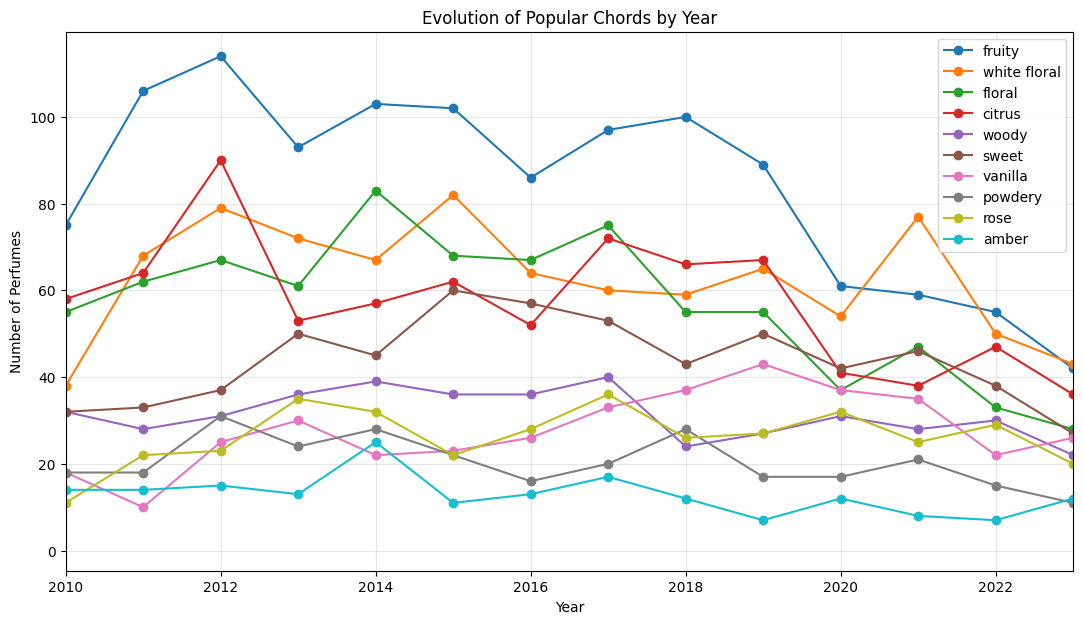

In [ ]:
# Multivariate Analysis: Evolution of Popular Accords by Year
plt.figure(figsize=(13, 7))

for accord in top_accords.index:
    accord_years = df_clean[df_clean['mainaccord1'] == accord].groupby('Year').size()
# count perfumes per year for each accord1
    plt.plot(accord_years.index, accord_years.values, marker='o', label=accord)

plt.xlim(2010,2023)
plt.xlabel('Year')
plt.ylabel('Number of Perfumes')
plt.title('Evolution of Popular Chords by Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## **Final Data Cleaning and Feature Reduction for Model**

In [ ]:
df_women = df_clean[["Perfume","Top","Middle","Base",
                     "mainaccord1","mainaccord2","mainaccord3",
                     "mainaccord4","mainaccord5"]].reset_index(drop=True)


In [ ]:
df_women.head()

,Perfume,Top,Middle,Base,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,classique-pride-2024,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",citrus,white floral,sweet,fresh,musky
1,ralph-pride-edition,"tangerine, green apple, freesia","magnolia, lime (linden blossom), osmanthus","musk, white iris",citrus,fruity,floral,sweet,green
2,waffle,"strawberry, almond, raspberry","butter, peach blossom, violet","praline, vanilla, musk",powdery,musky,violet,fruity,fresh
3,cherry-lady,"watermelon, mango, papaya, pineapple, peach, l...","lotus, hibiscus","musk, sandalwood, amber",fruity,tropical,sweet,ozonic,aquatic
4,french-kiss,"lemon verbena, neroli","fig, corn, magnolia, saffron, barberry, cherry...","pear wood, meringue, amber",fruity,woody,sweet,floral,citrus
